In [18]:
#In this notebook we show what happen exactly when we standardize each feature separately, ignoring the correlation between them.

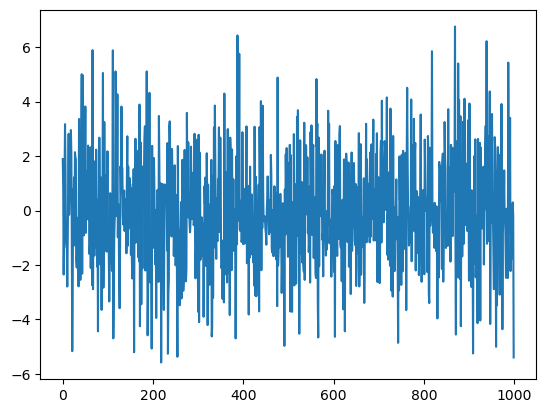

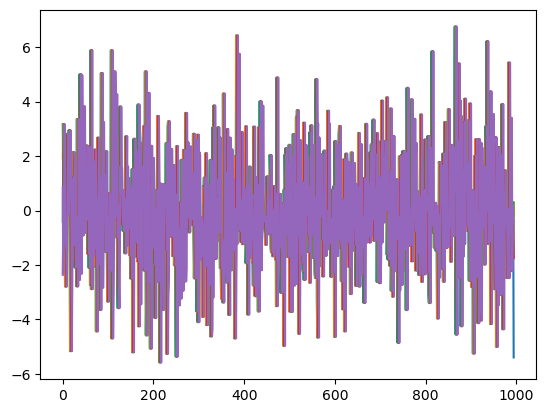

[[ 4.16187916 -0.1909261  -0.01421173  0.0233351  -0.03112472]
 [-0.1909261   4.13722094 -0.19244489 -0.01682918  0.01606763]
 [-0.01421173 -0.19244489  4.13731855 -0.19158897 -0.01740967]
 [ 0.0233351  -0.01682918 -0.19158897  4.14245292 -0.19306735]
 [-0.03112472  0.01606763 -0.01740967 -0.19306735  4.14040334]]
[[ 1.         -0.04601148 -0.00342486  0.00562    -0.0074979 ]
 [-0.04601148  1.         -0.04651495 -0.00406518  0.00388218]
 [-0.00342486 -0.04651495  1.         -0.04627881 -0.00420639]
 [ 0.00562    -0.00406518 -0.04627881  1.         -0.04661854]
 [-0.0074979   0.00388218 -0.00420639 -0.04661854  1.        ]]


In [19]:
#Generate 5 correlated timeseries, plot them and compute the correlation matrix

#Generate a single white noise timeseries and plot it
import numpy as np
import matplotlib.pyplot as plt

#Generate an MA(5) process
n = 1000
eps = np.random.normal(0,1,n)*2
ma = np.zeros(n)
for t in range(5,n):
    ma[t] = 1 + 0.6*eps[t-1] + 0.2*eps[t-2] + 0.1*eps[t-3] + 0.1*eps[t-4] + 0.1*eps[t-5] + eps[t]
plt.plot(eps)
plt.show()

#Generate 5 time series taking the lags of eps
y1 = eps[5:]
y2 = eps[4:-1]
y3 = eps[3:-2]
y4 = eps[2:-3]
y5 = eps[1:-4]


#Plot the 5 time series in the same plot
plt.plot(y1)
plt.plot(y2)
plt.plot(y3)
plt.plot(y4)
plt.plot(y5)
plt.show()

#Compute the COVARIANCE matrix and the correlation
Y = np.array([y1,y2,y3,y4,y5])
C = np.cov(Y)
print(C)
R = np.corrcoef(Y)
print(R)




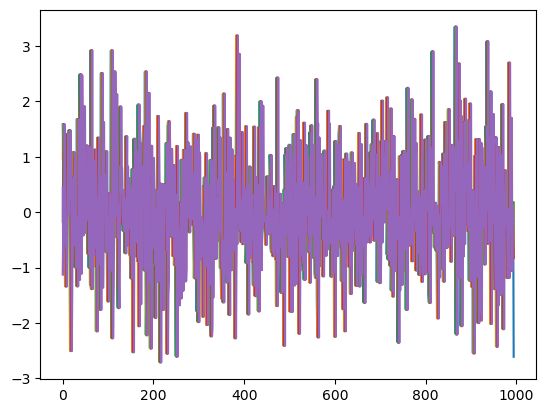

[[ 1.00100604 -0.04605777 -0.0034283   0.00562565 -0.00750544]
 [-0.04605777  1.00100604 -0.04656175 -0.00406927  0.00388609]
 [-0.0034283  -0.04656175  1.00100604 -0.04632537 -0.00421062]
 [ 0.00562565 -0.00406927 -0.04632537  1.00100604 -0.04666544]
 [-0.00750544  0.00388609 -0.00421062 -0.04666544  1.00100604]]
[ 0.00000000e+00  7.14113302e-18 -2.85645321e-17  3.57056651e-18
 -3.57056651e-18]


In [22]:
#We now standardize each time series separately and plot them

#Standardize each time series separately
Ys = np.zeros(Y.shape)
for i in range(5):
    Ys[i,:] = (Y[i,:]-np.mean(Y[i,:]))/np.std(Y[i,:])


#Plot the 5 time series in the same plot
plt.plot(Ys[0,:])
plt.plot(Ys[1,:])
plt.plot(Ys[2,:])
plt.plot(Ys[3,:])
plt.plot(Ys[4,:])
plt.show()

#Compute the COVARIANCE matrix
Cs = np.cov(Ys)
print(Cs)


